In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
import matplotlib.pyplot as plt


In [3]:
# 导入fetch_olivetti_faces数据集
dataset = fetch_olivetti_faces(data_home='D:\工作文件\SOH\MyImplement\\try\MLcode',shuffle=True)
faces = dataset.data
n_samples,n_features = faces.shape
print(n_samples,n_features)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to D:\工作文件\SOH\MyImplement\try\MLcode
400 4096


In [4]:
n_row,n_col = 3,8
n_components = n_row * n_col #  指定降维后的维数

# 全局均值
faces_centered = faces - faces.mean(axis=0)
# 各图片均值
faces_centered-=faces_centered.mean(axis=1).reshape(n_samples,-1)
print("Dataset consists of %d samples" % n_samples)

Dataset consists of 400 samples


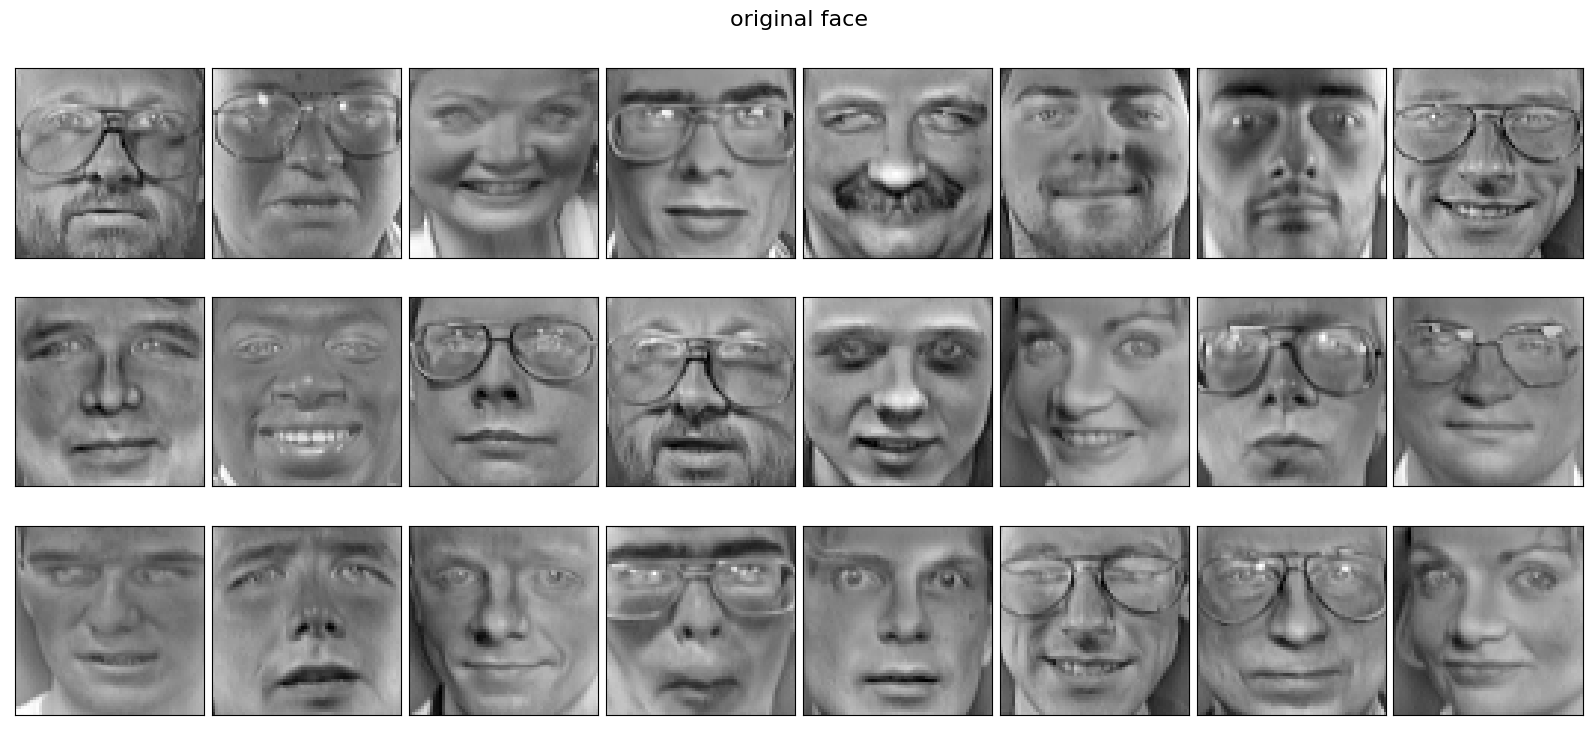

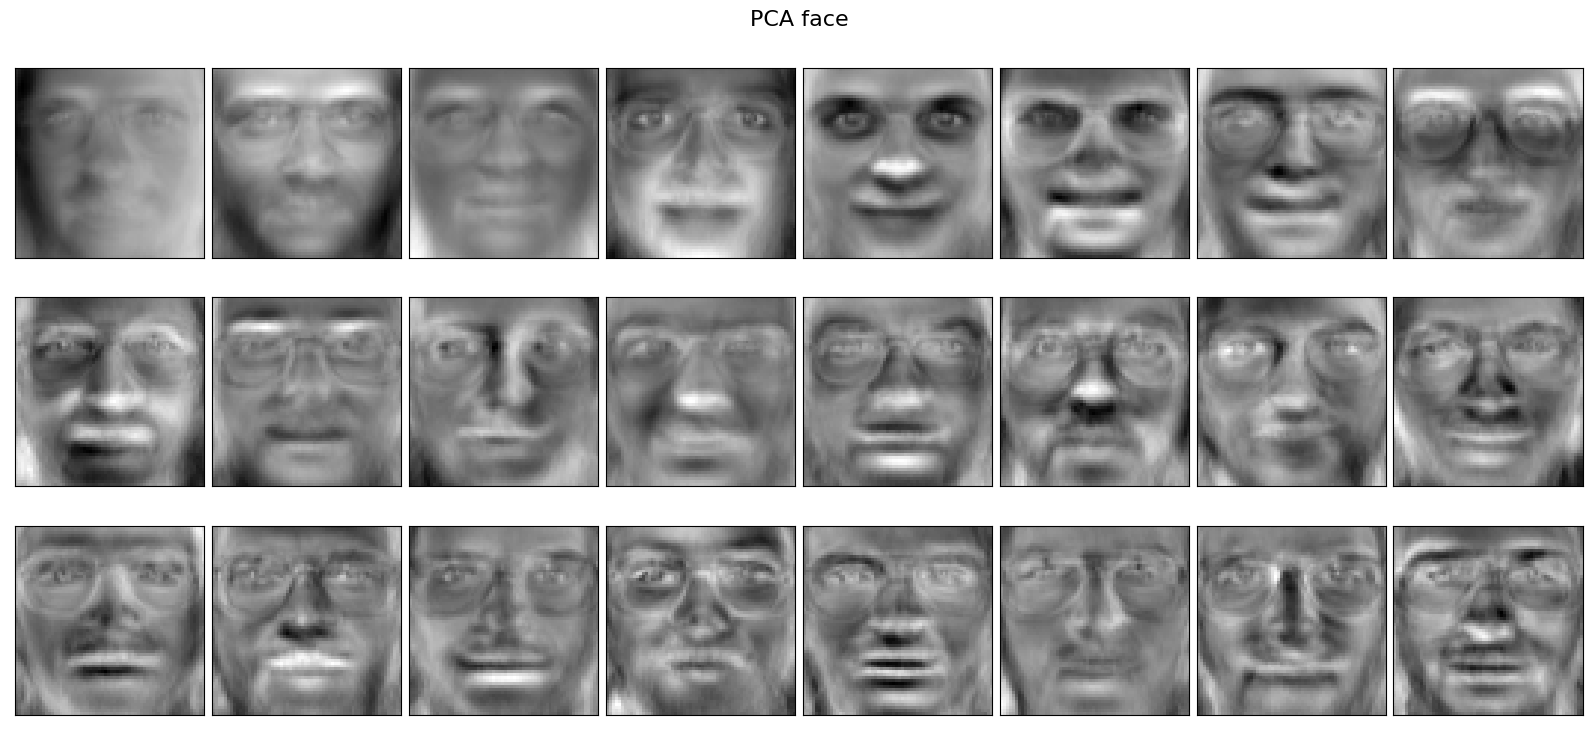

In [8]:
image_shape = (64,64) # 每幅图片大小
# 可视化函数
def plot_gallery(title,images):
    plt.figure(figsize = (2.0* n_col,2.6*n_row))
    plt.suptitle(title,size=16)
    for i,comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)
        vmax = max(comp.max(),-comp.min())
        plt.imshow(comp.reshape(image_shape),cmap=plt.cm.gray,interpolation='nearest',vmin=-vmax,vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01,0.05,0.99,0.93,0.04,0.0)
# 原始图片
plot_gallery("original face",faces_centered[:n_components])

# PCA生成特征脸
estimator = decomposition.PCA(n_components=n_components,whiten=True)
estimator.fit(faces_centered)
plot_gallery("PCA face",estimator.components_[:n_components])
plt.show()

比较PCA和KPCA的降维效果

In [9]:
# 生成数据集
import numpy as np
from sklearn.datasets import make_circles
np.random.seed(0)
X,y = make_circles(n_samples=400,factor=0.3,noise=0.05)
print(X.shape,y.shape)

# 使用PCA降维
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# 使用KPCA降维
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf",fit_inverse_transform=True,gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

(400, 2) (400,)


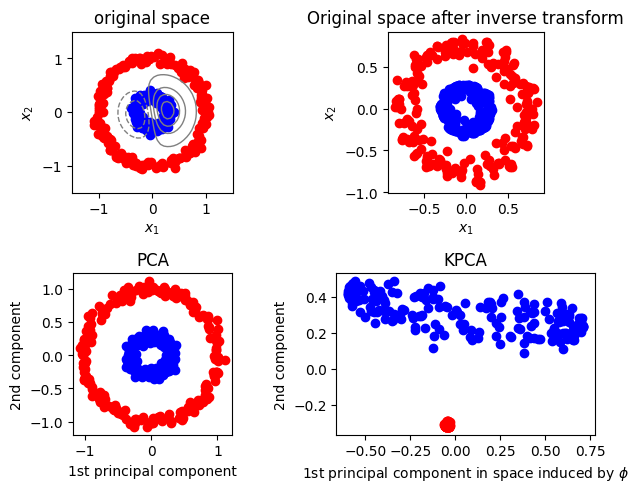

In [13]:
# 可视化
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2,2,1,aspect="equal")
plt.title("original space")
reds = y == 0
blues = y == 1
plt.plot(X[reds,0],X[reds,1],"ro")
plt.plot(X[blues,0],X[blues,1],"bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1,X2 = np.meshgrid(np.linspace(-1.5,1.5,50),np.linspace(-1.5,1.5,50))
X_grid = np.array([np.ravel(X1),np.ravel(X2)]).T
Z_grid = kpca.transform(X_grid)[:,0].reshape(X1.shape)
plt.contour(X1,X2,Z_grid,colors="grey",linewidths=1,origin="lower")

plt.subplot(2,2,2,aspect="equal")
plt.plot(X_back[reds,0],X_back[reds,1],"ro")
plt.plot(X_back[blues,0],X_back[blues,1],"bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


plt.subplot(2,2,3,aspect="equal")
plt.plot(X_pca[reds,0],X_pca[reds,1],"ro")
plt.plot(X_pca[blues,0],X_pca[blues,1],"bo")
plt.title("PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2,2,4,aspect="equal")
plt.plot(X_kpca[reds,0],X_kpca[reds,1],"ro")
plt.plot(X_kpca[blues,0],X_kpca[blues,1],"bo")
plt.title("KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.subplots_adjust(0.02,0.1,0.98,0.94,0.04,0.5)
plt.show()